# DATA CLEANING ON LIFE EXPECTANCY  DATASET

## OBJECTIVES:

This Dataset was gotten from Kaggle to practice all what I have learnt in the first course of IBM Machine Learning Specialization course on Cousera

(Exploratory Data Analysis For Machine Learning). For this Dataset, I will perform the following;

1. Data Analysis
2. Exploratory Data Analysis (EDA)
3. Feature Ecngineering and Variable Transformation
4. Hypothesis Testing

And I will be using libraries like;

-Numpy

-Pandas

-Matplotlib

-Scipy

-Scikit-learn and among others

## IMPORTING NECCESARY LIBRARIES

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats import norm
from scipy import stats

## Reading and Understanding data

In [2]:
data = pd.read_csv("C:\\Users\HP\\Desktop\\My documents\\Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## DATA CLEANING
Here, i will be cleaning the dataset to remove some bad data and transform it to better version that can be used to building a machine learning models. I will be checking for;
1. Missing data
2. Duplicate data
3. Misspelt word
4. Transforming date data
5. Checking for outliers

In [3]:
data.rename(columns={"Life expectancy ":"LifeExpectancy"}, inplace=True)
data.head()

,Country,Year,Status,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

In [5]:
#checking for information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   LifeExpectancy                   2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

According to the output above, we have 2938 entries, 0 to 2938, as well as 21 features. The "Non-Null Count" column shows the number of non-null entries. If the count is 2938 then there is no missing values for that particular feature. 'Life Expectancy' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (int64 and float64) and object data types.

Next, let's use the describe() function to show the count, mean, min, max of the 'Life Expectancy' attribute.

In [6]:
data["LifeExpectancy"].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: LifeExpectancy, dtype: float64

From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section.

### Looking for correlations

Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the LifeExpectancy attribute) and other predictor variables, as some of them might not have any major impact in determining whether is going to cancel or not and will not be used in the analysis.  According to the course there are many ways to discover correlation between the target variable and the rest of the features, which includes;
1. Building pair 
2. plots scatter plots
3. heat maps, and a correlation matrixes are the most common ones. 
Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficent] (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [7]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num_corr = data_num.corr()['LifeExpectancy'][:-1] # -1 means that the latest row is Life expectancy 
top_features = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with Life expectancy :\n{}".format(len(top_features), top_features))

There is 5 strongly correlated values with Life expectancy :
LifeExpectancy                     1.000000
Income composition of resources    0.724776
 BMI                               0.567694
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: LifeExpectancy, dtype: float64


Above, there are 5 features that are strongly correlated with Life expectancy, 3 of them are positively correlated while the last two (HIV/AIDS and Adult Mortality) are both negatively correlated

Next, let's generate some bar plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data according to the first course of IBM Machine Learning Course

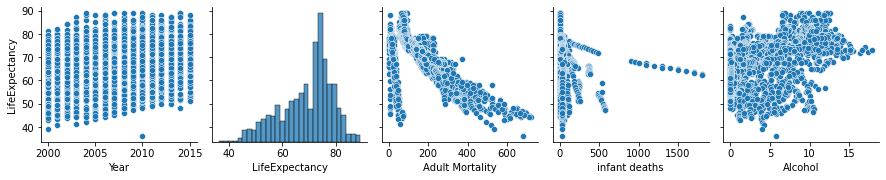

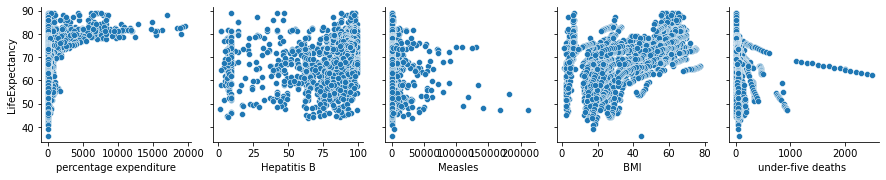

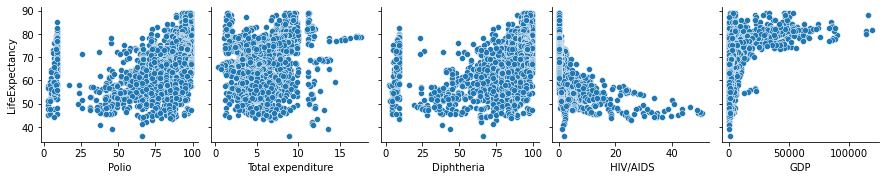

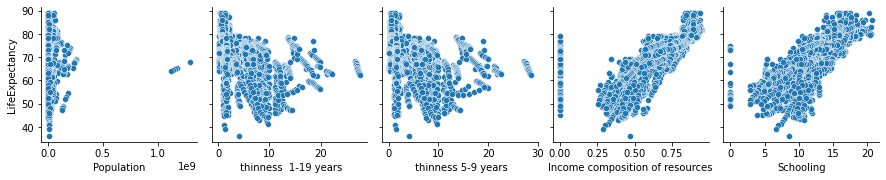

In [8]:
for i in range(0, len(data_num.columns), 5):
    sns.pairplot(data=data_num,
                x_vars=data_num.columns[i:i+5],
                y_vars=['LifeExpectancy'])

### Log Transformation

In this section, we are going to inspect whether our 'LifeExpectancy' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'canceled' distribution using the distplot() function from the seaborn library.

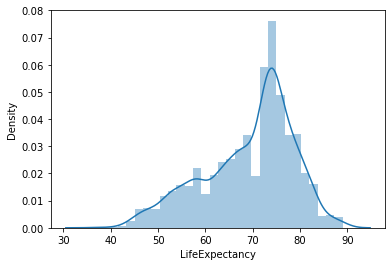

In [10]:
df_untransformed = sns.distplot(data['LifeExpectancy'])

As the plot shows, our 'LifeExpectancy' deviates from the normal distribution. It has a longer tail to the left, so we call it a negative skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.

Here, we can simply use the `skew()` function to calculate our skewness level of the Life Expectancy

In [11]:
print("Skewness: %f" % data['LifeExpectancy'].skew())

Skewness: -0.638605


Our skewness value is relatively smaller than (-1) which means its not highly skewed. So I'm going to leave it without transforming it.

### Handling Duplicates

Here, I will be handling duplicates in the datasets as mentioned above

In [22]:
duplicate = data[data.duplicated()]
print("Duplicate Rows :", duplicate)
 

Duplicate Rows : Empty DataFrame
Columns: [Country, Year, Status, LifeExpectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles ,  BMI , under-five deaths , Polio, Total expenditure, Diphtheria ,  HIV/AIDS, GDP, Population,  thinness  1-19 years,  thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]


From the output it can be seen that there is no duplicates in the dataset

### Handling Missing Values
Here, I will be checking for missing values in the dataset.

In [23]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
LifeExpectancy                      10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Text(0.5, 1.0, 'Total Missing Values')

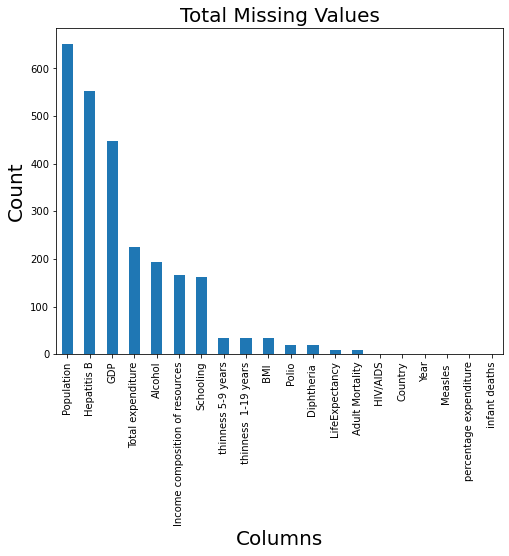

In [25]:
#using visuals to detect missing values
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

FRom both methods, it can be seen that attrributes like population, hepatitus B, Gdp, Total expenditure, Alchohol, income composition of resources and schooling all have high missing values.

In [29]:
median = data.median()

In [30]:
#Using median to fill all the missing values
data.fillna(median, inplace=True)
data.isnull().sum()

Country                            0
Year                               0
Status                             0
LifeExpectancy                     0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Handling Outliers
Here I will be checking for outliers in our data set using both boxplot and scatter plots

<AxesSubplot:xlabel='LifeExpectancy'>

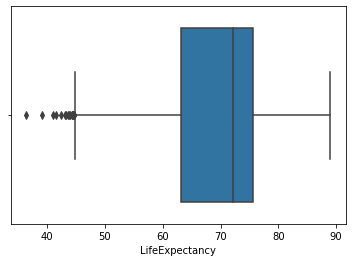

In [34]:
sns.boxplot(x=data['LifeExpectancy'])

<AxesSubplot:xlabel='infant deaths'>

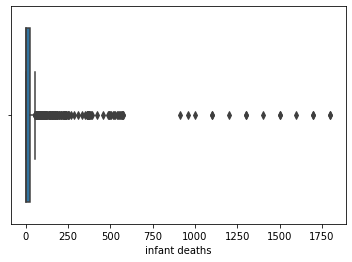

In [36]:
sns.boxplot(x=data['infant deaths'])

As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'LifeExpectancy' and the 'infants death' might be the actual true data points and do not need to be removed.

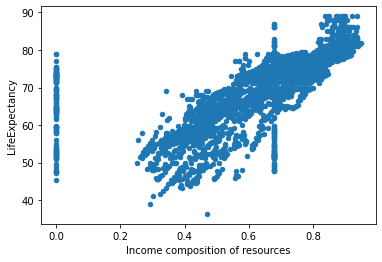

In [47]:
#using Bivarate Analysis to check outliers
outlier = data.plot.scatter(x='Income composition of resources',
                      y='LifeExpectancy')

In [48]:
data.sort_values(by = 'Income composition of resources', ascending = False)[:2]

,Country,Year,Status,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1910,Norway,2015,Developed,81.8,59.0,0,5.97,0.000000,92.0,14,...,95.0,5.755,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7
1911,Norway,2014,Developed,81.6,61.0,0,6.06,177.638288,92.0,3,...,93.0,9.720,93.0,0.1,975.49856,5137232.0,0.8,0.7,0.945,17.7


In [49]:
#Now we will use the pandas `drop()` function to remove these two rows.
outliers_dropped = data.drop(data.index[[1910,1911]])

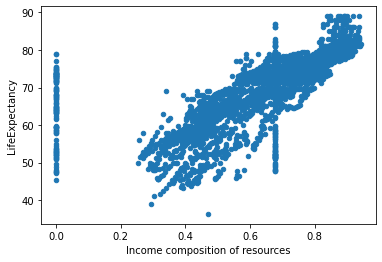

In [50]:
new_plot = outliers_dropped.plot.scatter(x='Income composition of resources',
                                         y='LifeExpectancy')

This is the end of the data cleaning section. Now, the data is clean to use for further analysis

In [52]:
#saving data in a new csv file
data.to_csv(r'C:\Users\HP\Desktop\My documents\clean_lifeexpectancy.csv', index=False)


In [53]:
data.shape

(2938, 22)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   LifeExpectancy                   2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               